# Predcited Heart Disease Diagnoses - DSCI100 Group Project

## Group Members
* Gary Wu 
* Abner Inder Singh Bal
* Taarika Rajani

## Introduction

### Background Information on our topic
* Heart disease is one of the leading causes of death in developed nations as it is considered a lifestyle related disorder (1 person dies every 36 seconds from cardiovascular disease in the US). As rates of heart disease increase and strain medical systems around the world, our group has chosen to explore how we can use predictor variables (in the form of patient data) to predict diagnoses of disease. Perhaps using such data to make predictions can save costs associated with expensive medical testing and can identify patients at greater risk for diagnoses (who could then be allocated further testing resources).

### Question 
* How can we use predictor variables (specific patient data) to predict the presence of heart disease? Specifically, can age, cholesterol levels, resting electrocardiographic test results and chest pain data be used to predict patients' heart disease diagnoses?

### Dataset Description

* The Cleveland Heart Disease Dataset contains data on 76 patient attributes related to heart disease. All published experiments have previously used a subset of 14 attributes most relevant to heart disease. The dataset is preprocessed and contains data which is already in a tidy format. Of the 14 columns previously used in experimental analyses we are going to use the 5 columns: 
age , chol , restecg , cp and num.


  
  


## Dataset Attribute Information:
* Only 5 out of  14 columns will be used
 * Age : age in years     
 * chol: serum cholesterol in mg/dl   
 * restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
 * cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
 * num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing (no disease)
        -- Value 1: > 50% diameter narrowing (early stage disease)
        -- Values above 1: Heart disease


## Preliminary exploratory data analysis

In [3]:
# load libs, read data from web, tidy, split into train/test
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
set.seed(1)

print("Read Attribute Information for more info about column names")

heart_disease_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
col_names = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
heart_data <- read_csv(heart_disease_url, col_names = col_names) %>% 
                        select(age,chol,restecg,cp ,num) %>%
                        mutate(restecg=as.factor(restecg),cp=as.factor(cp),num=as.factor(num))

df_split <- initial_split(heart_data, prop = 0.75, strata = num)
heart_data_train <- training(df_split)
heart_data_test <- testing(df_split)

head(heart_data_train, 5)

[1] "Read Attribute Information for more info about column names"


Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_character(),
  thal = col_character(),
  num = col_double()
)



age,chol,restecg,cp,num
<dbl>,<dbl>,<fct>,<fct>,<fct>
63,233,2,1,0
67,286,2,4,2
67,229,2,4,1
37,250,0,3,0
41,204,2,2,0


## Summarize and visualize 

[1] "Read Attribute Information for more info about column names"


count
<int>
228


`summarise()` ungrouping output (override with `.groups` argument)



cp,count
<fct>,<int>
1,13
2,36
3,67
4,112


`summarise()` ungrouping output (override with `.groups` argument)



restecg,count
<fct>,<int>
0,114
1,3
2,111


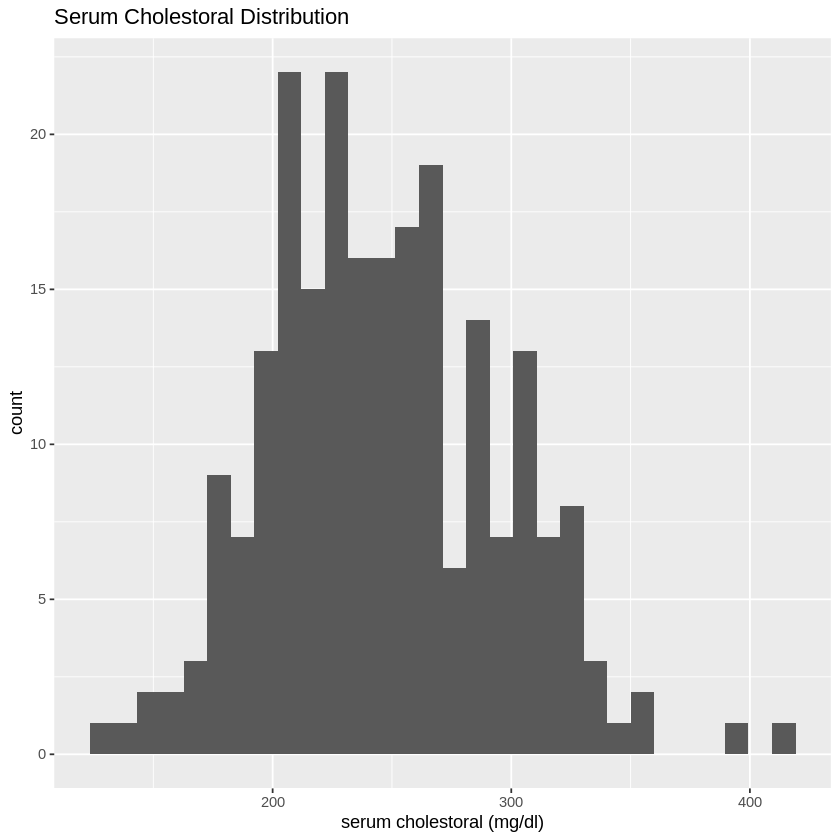

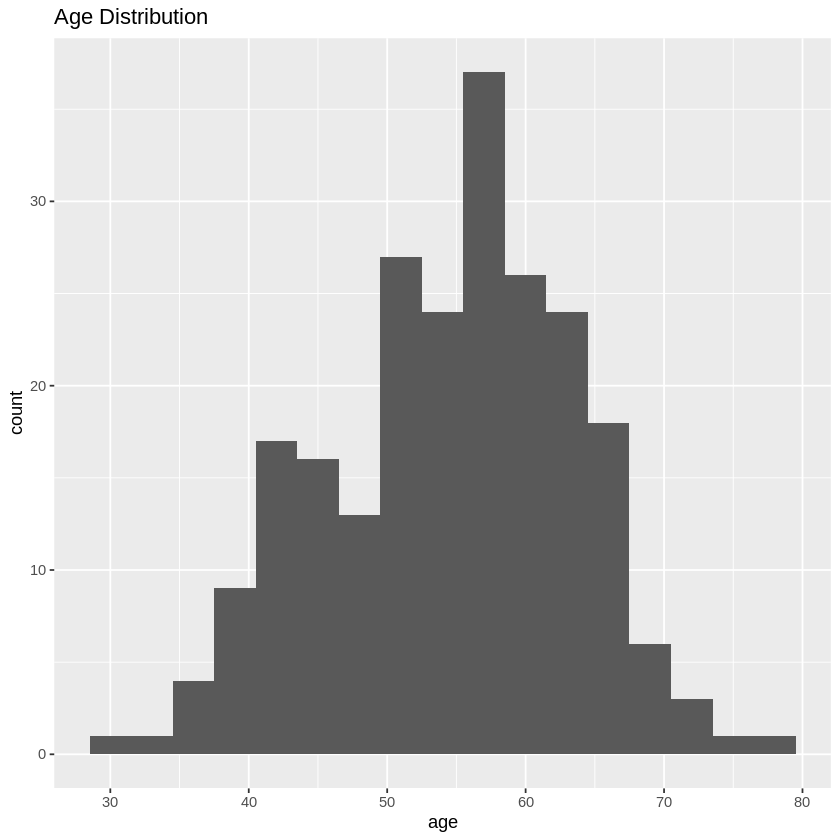

In [4]:
# data summarize
print("Read Attribute Information for more info about column names")

count_num <- group_by(heart_data_train) %>%
            summarize(count = n())
count_num #total number of data points


count_cp <- group_by(heart_data_train,cp) %>%
            summarize(count = n())
count_cp

count_restecg <- group_by(heart_data_train,restecg) %>%
            summarize(count = n())
count_restecg  

# data visualize

chol_plot <- ggplot(heart_data_train,  aes(x = chol)) +
    geom_histogram(bins=30) +
    xlab("serum cholestoral (mg/dl)") +
    ggtitle("Serum Cholestoral Distribution")
    
chol_plot

age_plot <- ggplot(heart_data_train,  aes(x = age)) +
    geom_histogram(binwidth = 3) +
    ggtitle("Age Distribution")
    
age_plot

## Methods
* We are going to use the age, chol, restecg and cp columns to predict the num column - diagnosis of heart disease (where any value above 0 shows the presence of angiographic disease). We selected these predictors as heart disease is linked to age, (high) cholesterol, (abnormal) ECG readings and chest pain (a common symptom of heart disease). 
* Future visualizations will use color prediction maps to help visualize and easily interpret data. 
* We will create a k-nn model specification with a recipe and train the model with the training data to build the classifier. We will then use the testing data to make the predictions.


## Expected Outcomes 
### What do you expect to find?

* We expect to find a relation between the predictors(age , chol , restecg , cp )  and num (heart disease). Based on our own knowledge we think higher ages, cholesterol values, left ventricular hypertrophy (from restecg results) and all types of chest pain will be correlated with heart disease.

### What impact could such findings have?

* Findings could lead to recognition of heart disease on the basis of predictor variable data. Our predictor data is quite easily obtainable from basic visits in medical settings. If this data could reliably predict diagnoses we could help save medical costs associated with administering heart disease specific expensive medical testing to everyone in the population and can identify patients at greater risk for diagnoses (who could then be allocated further testing resources).

### What future questions could this lead to 

 * Is there a relation between all our predictors and num ? 
 * What combination of attribute data can lead to a more accurate diagnosis of heart disease ?
 * Does cholesterol have a disproportionate effect on presence of heart disease? 
 * Do certain attributes act as better predictor variables depending on the age range of the patient?
